In [53]:
import pandas as pd
import numpy as np

import re

import matplotlib.pyplot as plt

In [54]:
df = pd.read_csv("leaderboard.csv")
df.head()

,User_Addr,Class,Eyes,Ears,Back,Mouth,Horn,Tail,Winrate
0,https://axie.zone//profile?ron_addr=0x62ea77d4...,Plant,Papi,Lotus,Bidens,Zigzag,Pliers,Yam,0
1,https://axie.zone//profile?ron_addr=0x62ea77d4...,Reptile,Confused,Friezard,Bone Sail,Toothless Bite,Cerastes,Grass Snake,0
2,https://axie.zone//profile?ron_addr=0x62ea77d4...,Dusk,Telescope,Seaslug,Indian Star,Tiny Turtle,Wing Horn,Grass Snake,0
3,https://axie.zone//profile?ron_addr=0xdaf19aef...,Plant,Confused,Clover,Pumpkin,Pincer,Leaf Bug,Yam,0
4,https://axie.zone//profile?ron_addr=0xdaf19aef...,Dusk,Gecko,Tiny Fan,Garish Worm,Toothless Bite,Cerastes,Grass Snake,0


# Team Composition

<AxesSubplot:title={'center':'Top Team Compositions'}>

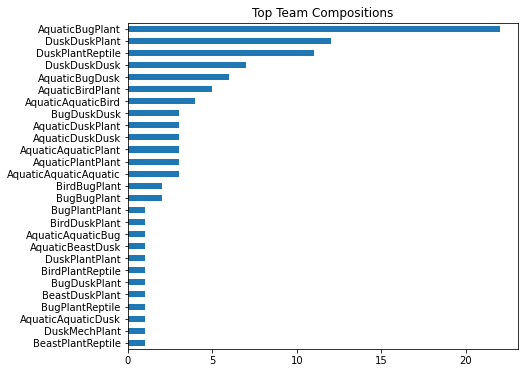

In [55]:
# Create a copy of the data frame
df_comp = df.copy()

# Map the class values to their first letter
# df_comp["Class"] = df_comp["Class"].map(lambda x: x[0])

# Aggregate classes into class composition
sr_comp = df_comp.groupby("User_Addr")["Class"].apply(lambda x: x.sum())

# Convert series to dataframe
df_comp = pd.DataFrame(sr_comp)
df_comp = df_comp.reset_index()
df_comp["Class"] = df_comp["Class"].map(lambda x: ''.join(sorted(re.findall('[A-Z][^A-Z]*', x))))

# Show plot
plt.figure(figsize=(7, 6))
df_comp["Class"].value_counts()[::-1].plot.barh(title="Top Team Compositions")

# Top Cards Per Class

In [56]:
def top_card(df, cls):
  fig, axes = plt.subplots(2, 2, figsize=(20, 10))

  df_class = df[df["Class"] == cls]
  df_class["Back"].value_counts()[::-1].plot.barh(title="Back (" + cls + ")", ax=axes[0,0])
  df_class["Mouth"].value_counts()[::-1].plot.barh(title="Mouth (" + cls + ")", ax=axes[0,1])
  df_class["Horn"].value_counts()[::-1].plot.barh(title="Horn (" + cls + ")", ax=axes[1,0])
  df_class["Tail"].value_counts()[::-1].plot.barh(title="Tail (" + cls + ")", ax=axes[1,1])

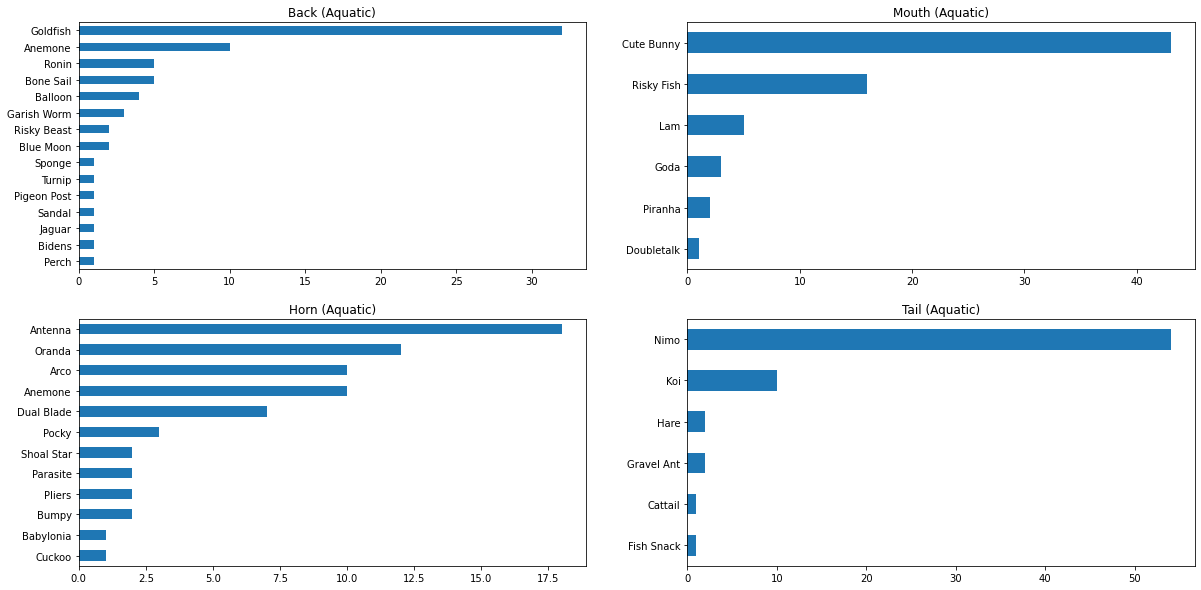

In [57]:
top_card(df, "Aquatic")

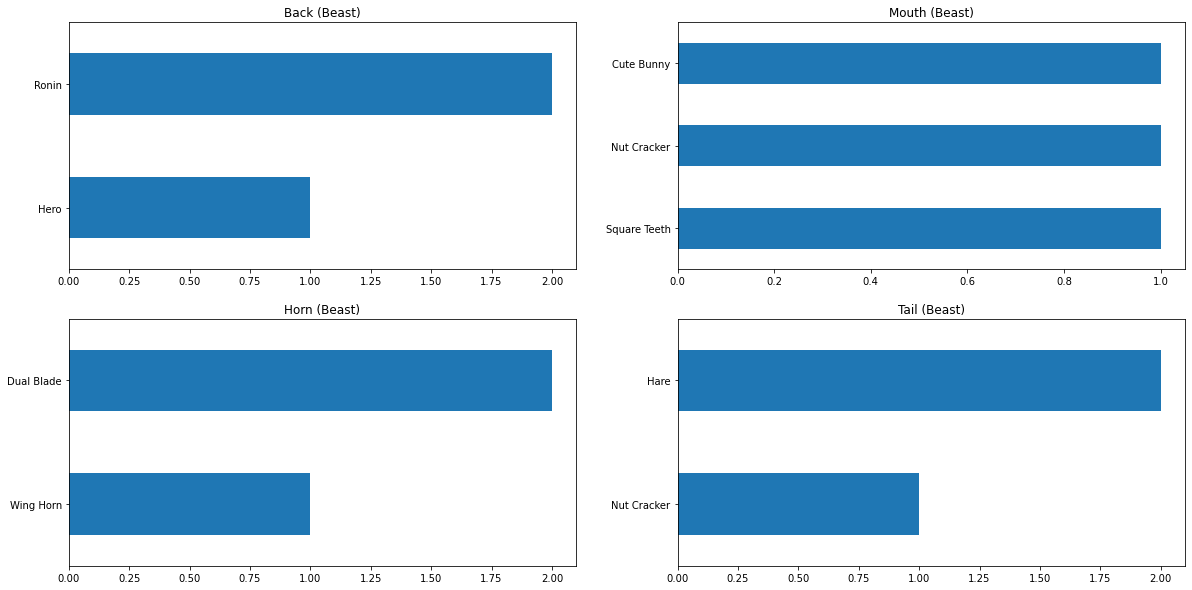

In [58]:
top_card(df, "Beast")

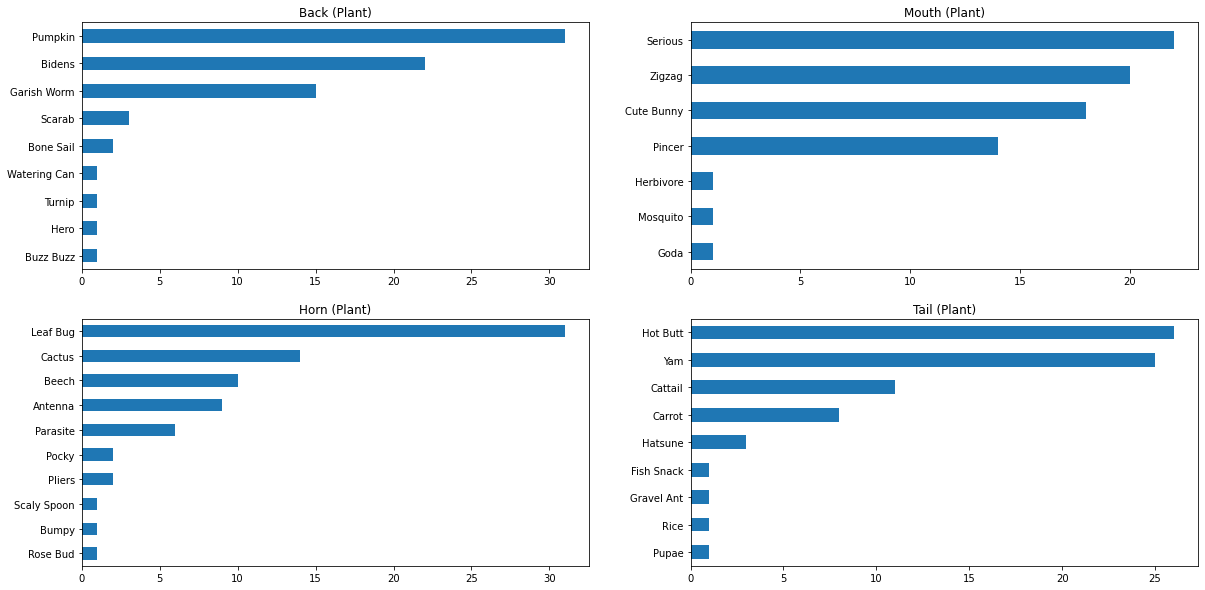

In [59]:
top_card(df, "Plant")

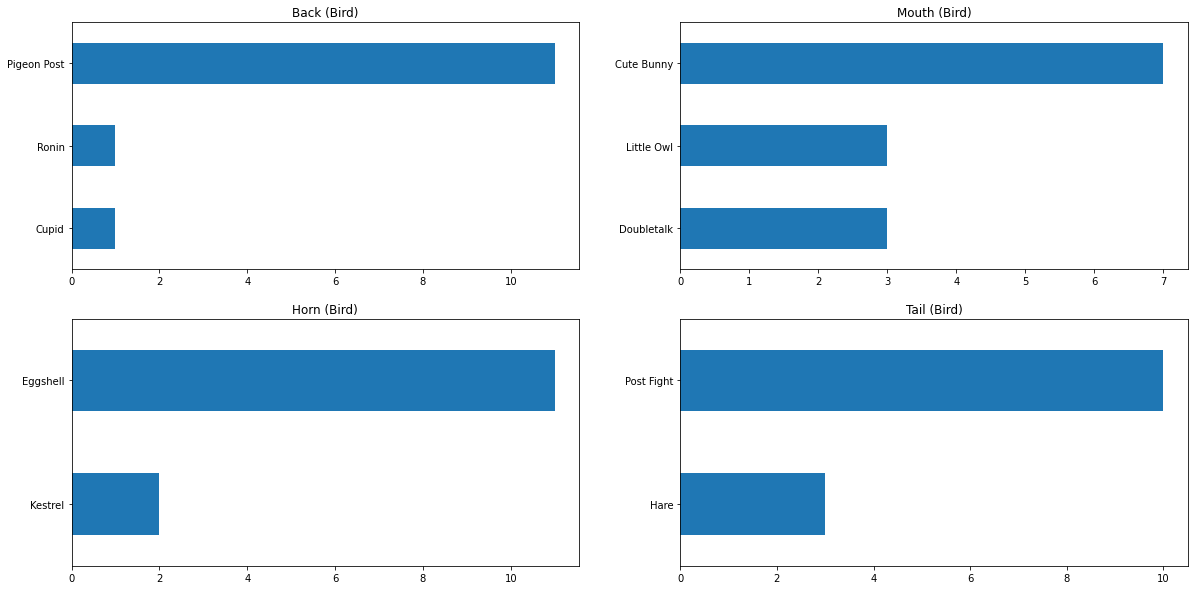

In [60]:
top_card(df, "Bird")

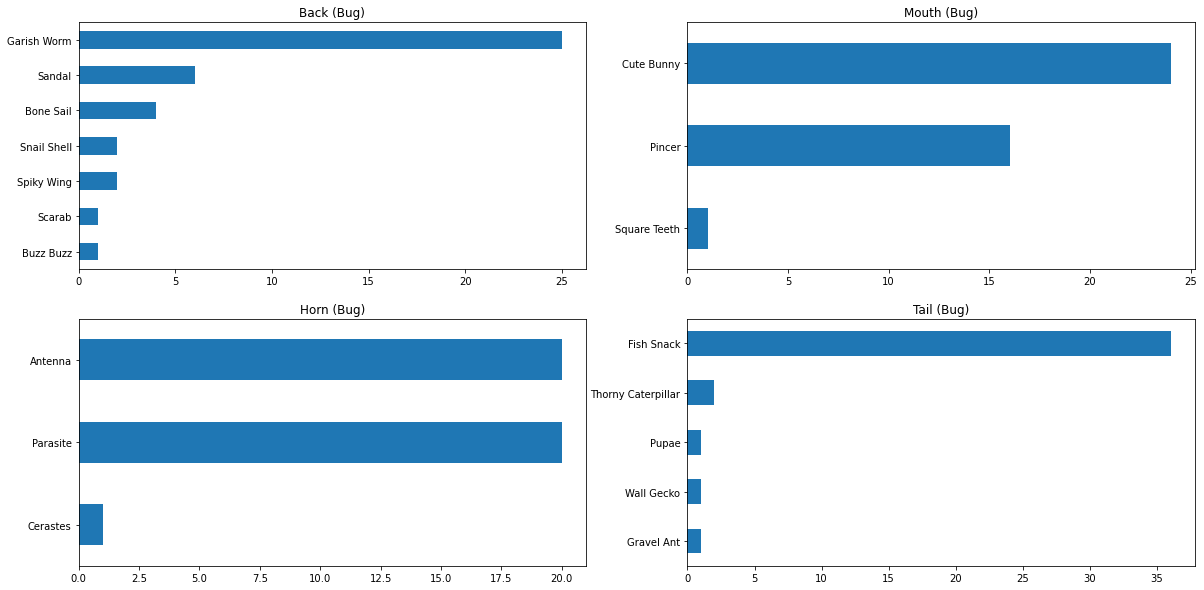

In [61]:
top_card(df, "Bug")

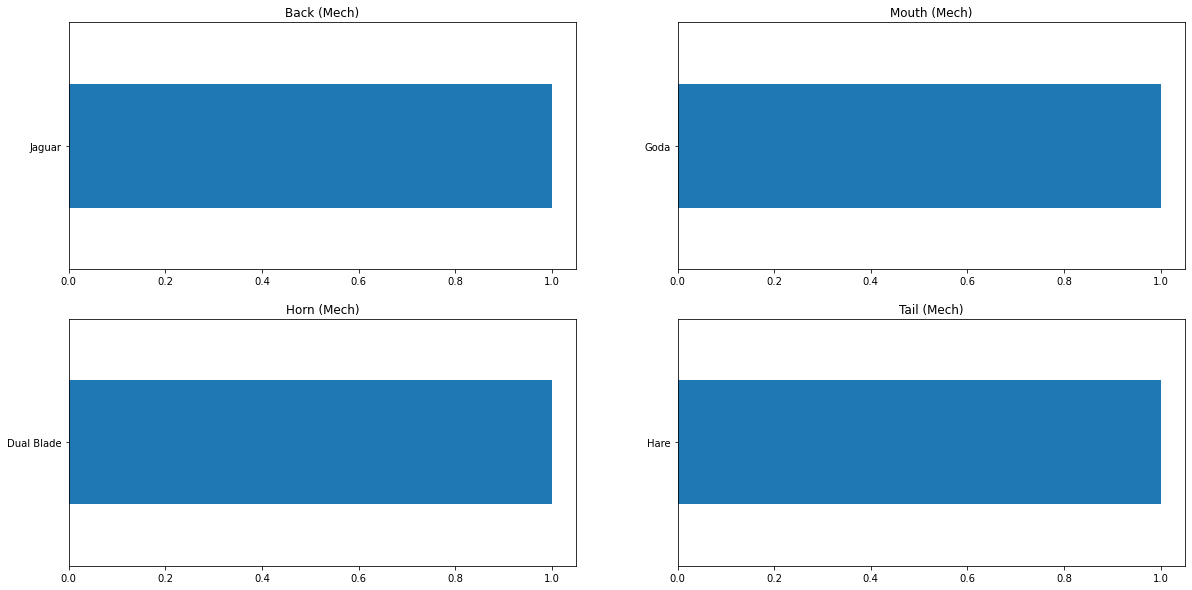

In [62]:
top_card(df, "Mech")

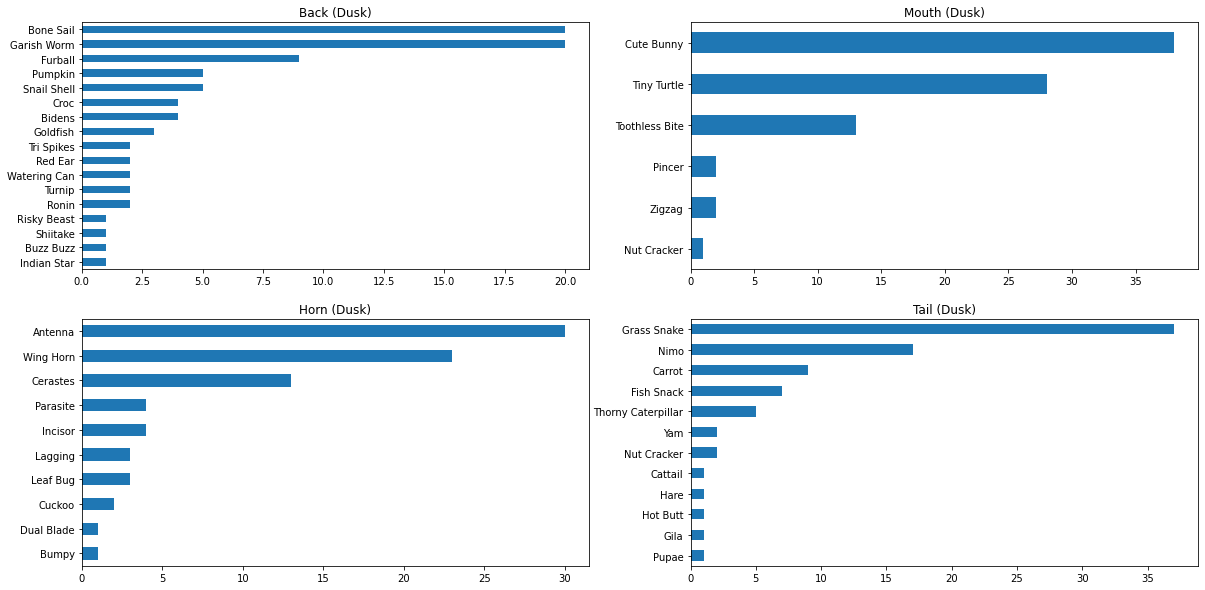

In [63]:
top_card(df, "Dusk")

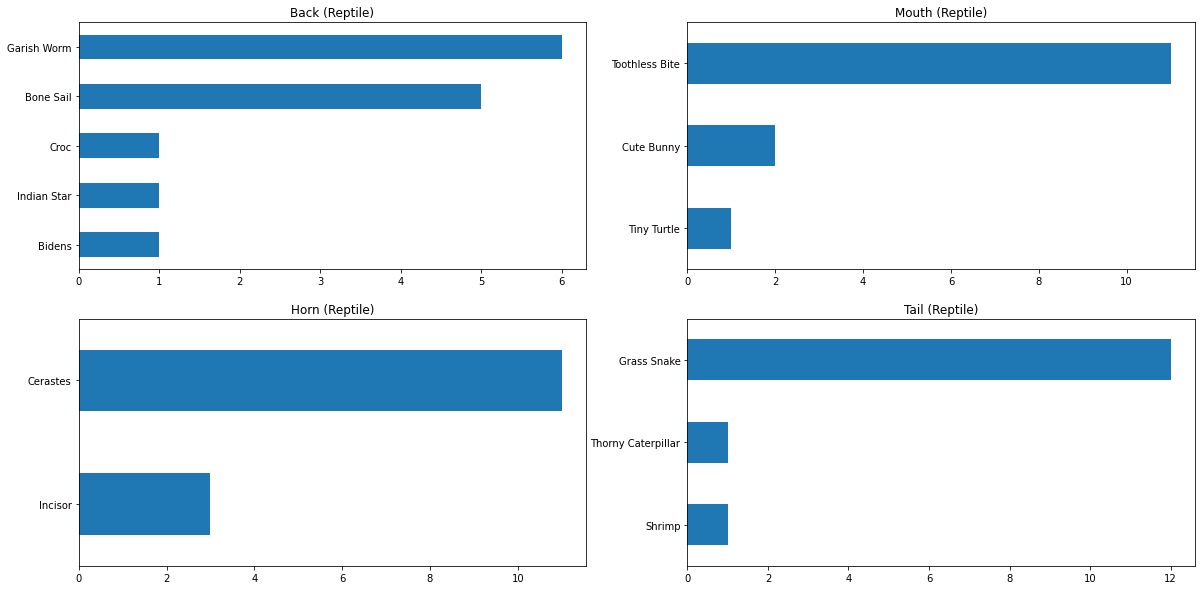

In [64]:
top_card(df, "Reptile")

# Top Combos

In [65]:
def visualize_combo(df, cls):
  fig, axes = plt.subplots(3, 2, figsize=(22, 15))

  df[df["Class"] == cls]["Back-Mouth"].value_counts()[5::-1].plot.barh(title="Back-Mouth (" + cls + ")", ax=axes[0,0])
  df[df["Class"] == cls]["Back-Horn"].value_counts()[5::-1].plot.barh(title="Back-Horn (" + cls + ")", ax=axes[0,1])
  df[df["Class"] == cls]["Back-Tail"].value_counts()[5::-1].plot.barh(title="Back-Tail (" + cls + ")", ax=axes[1,0])
  df[df["Class"] == cls]["Mouth-Horn"].value_counts()[5::-1].plot.barh(title="Mouth-Horn (" + cls + ")", ax=axes[1,1])
  df[df["Class"] == cls]["Mouth-Tail"].value_counts()[5::-1].plot.barh(title="Mouth-Tail (" + cls + ")", ax=axes[2,0])
  df[df["Class"] == cls]["Horn-Tail"].value_counts()[5::-1].plot.barh(title="Horn-Tail (" + cls + ")", ax=axes[2,1])

In [66]:
ability_cols = ["Back", "Mouth", "Horn", "Tail"]

def generate_card_pairs(row):
  for i in range(len(ability_cols)):
    for j in range(i + 1, len(ability_cols)):
      row[ability_cols[i] + "-" + ability_cols[j]] = row[ability_cols[i]] + " / " + row[ability_cols[j]]
  return row

def card_pairs(df):
  df = df.apply(generate_card_pairs, axis=1)
  df = df.drop(["Eyes", "Ears", "Back", "Mouth", "Horn", "Tail"], axis=1)
  return df

df_pairs = card_pairs(df)

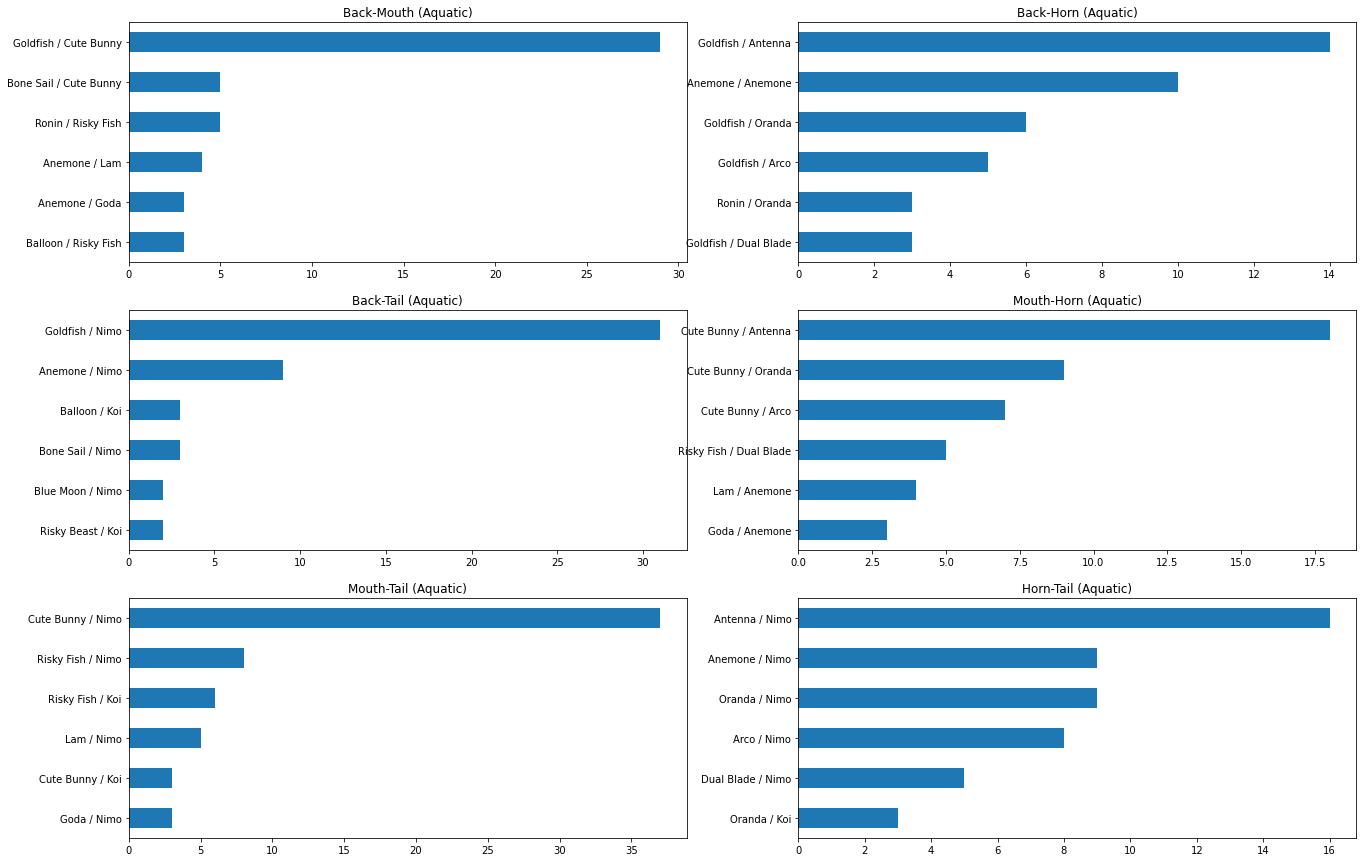

In [67]:
visualize_combo(df_pairs, "Aquatic")

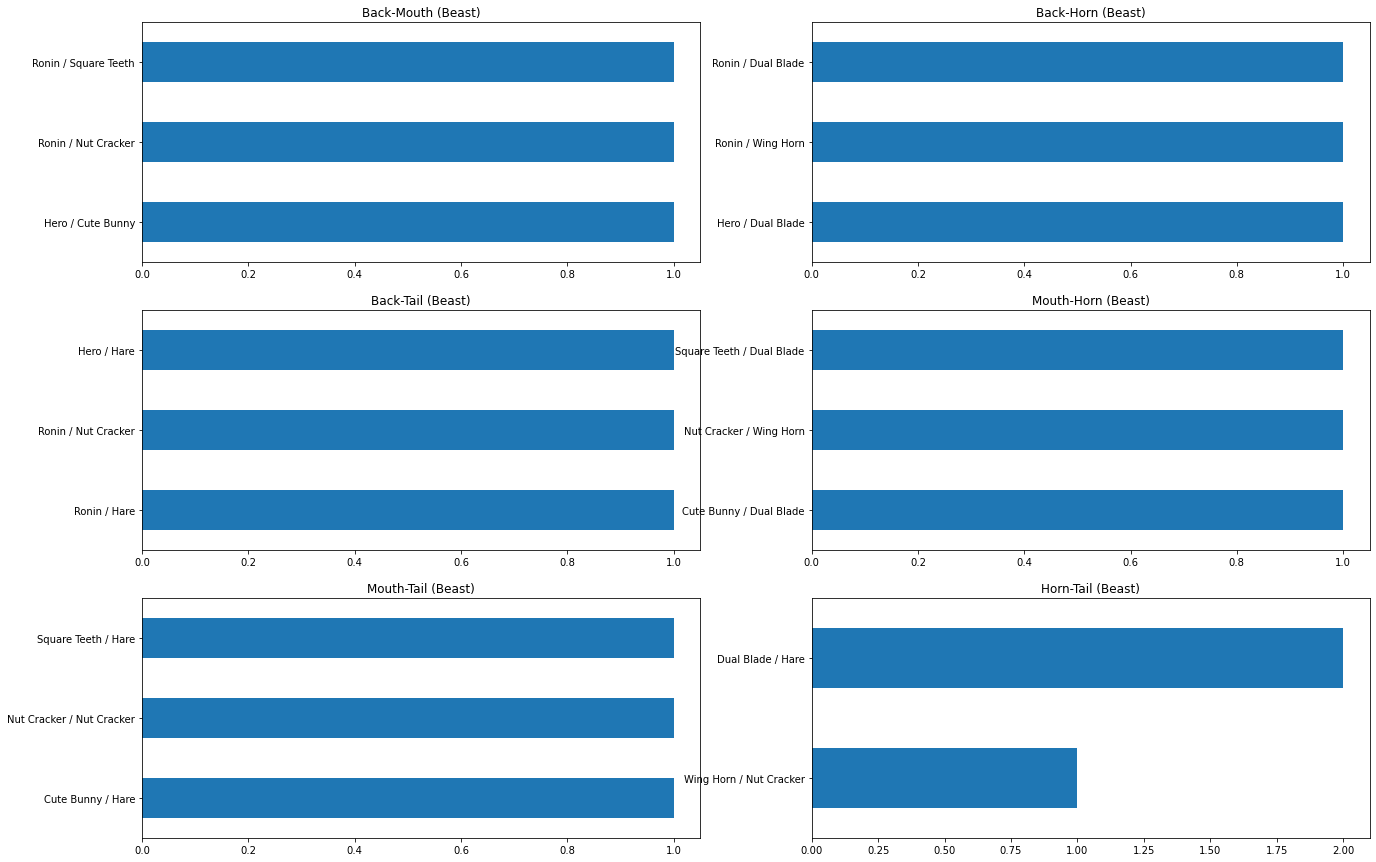

In [68]:
visualize_combo(df_pairs, "Beast")

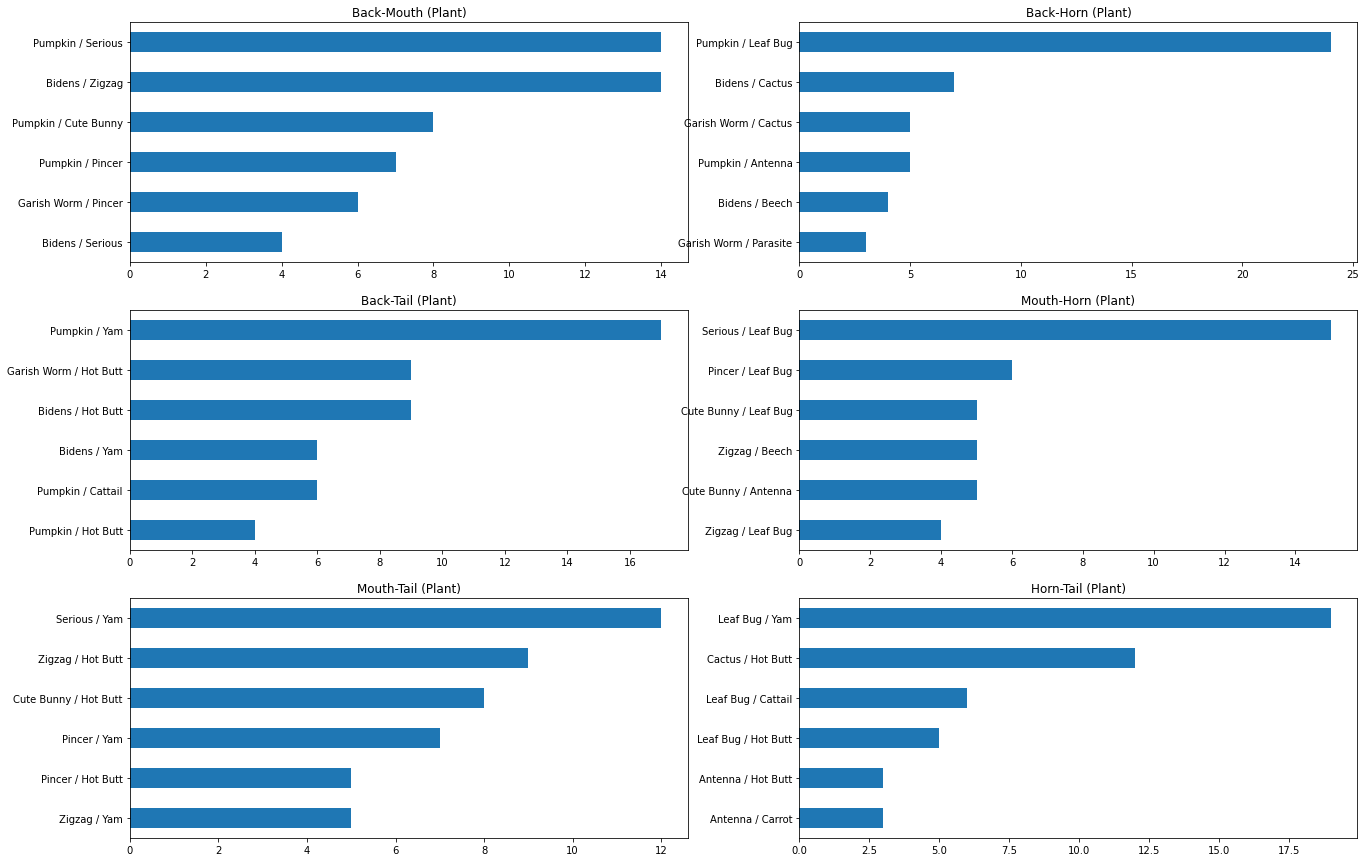

In [69]:
visualize_combo(df_pairs, "Plant")

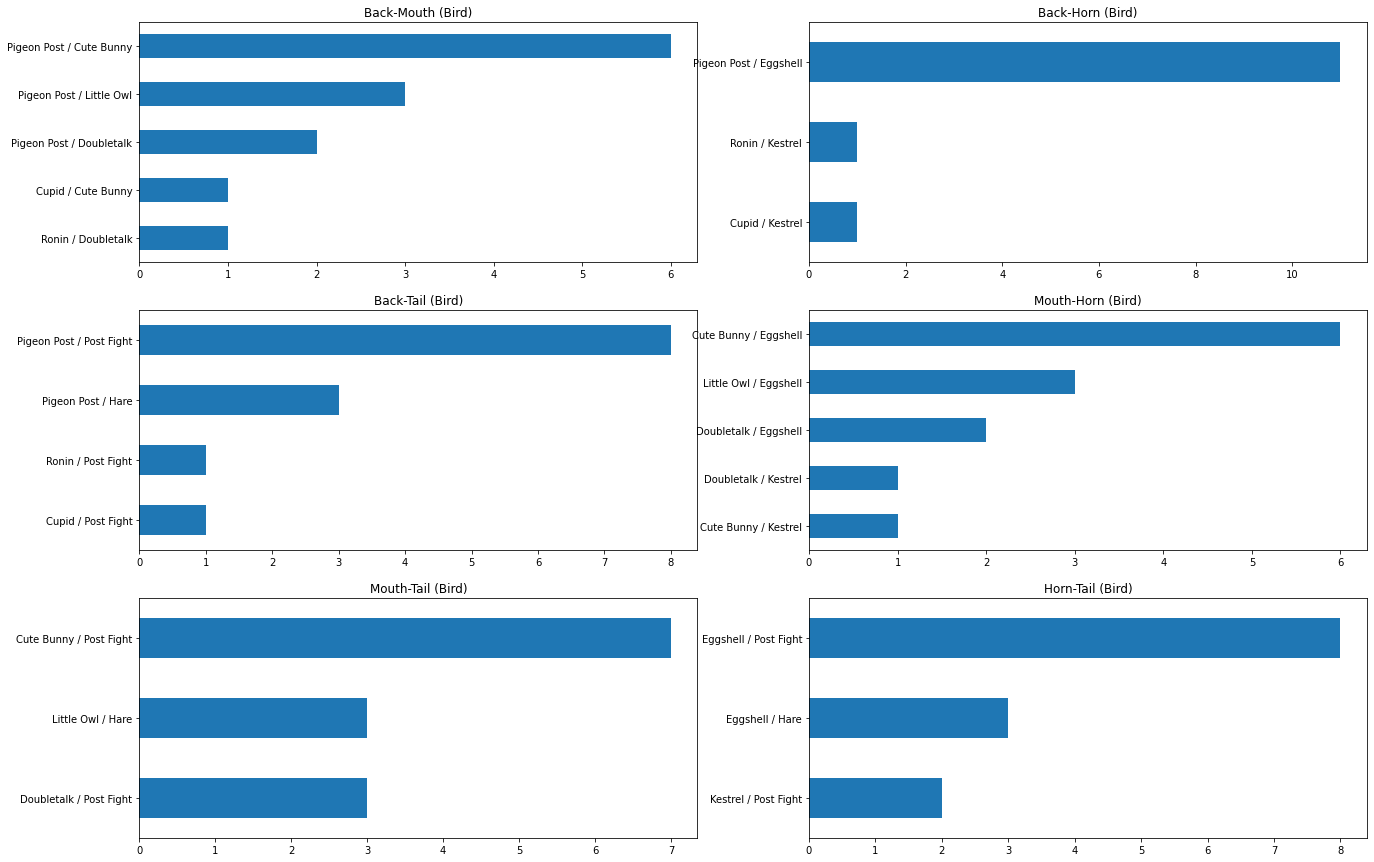

In [70]:
visualize_combo(df_pairs, "Bird")

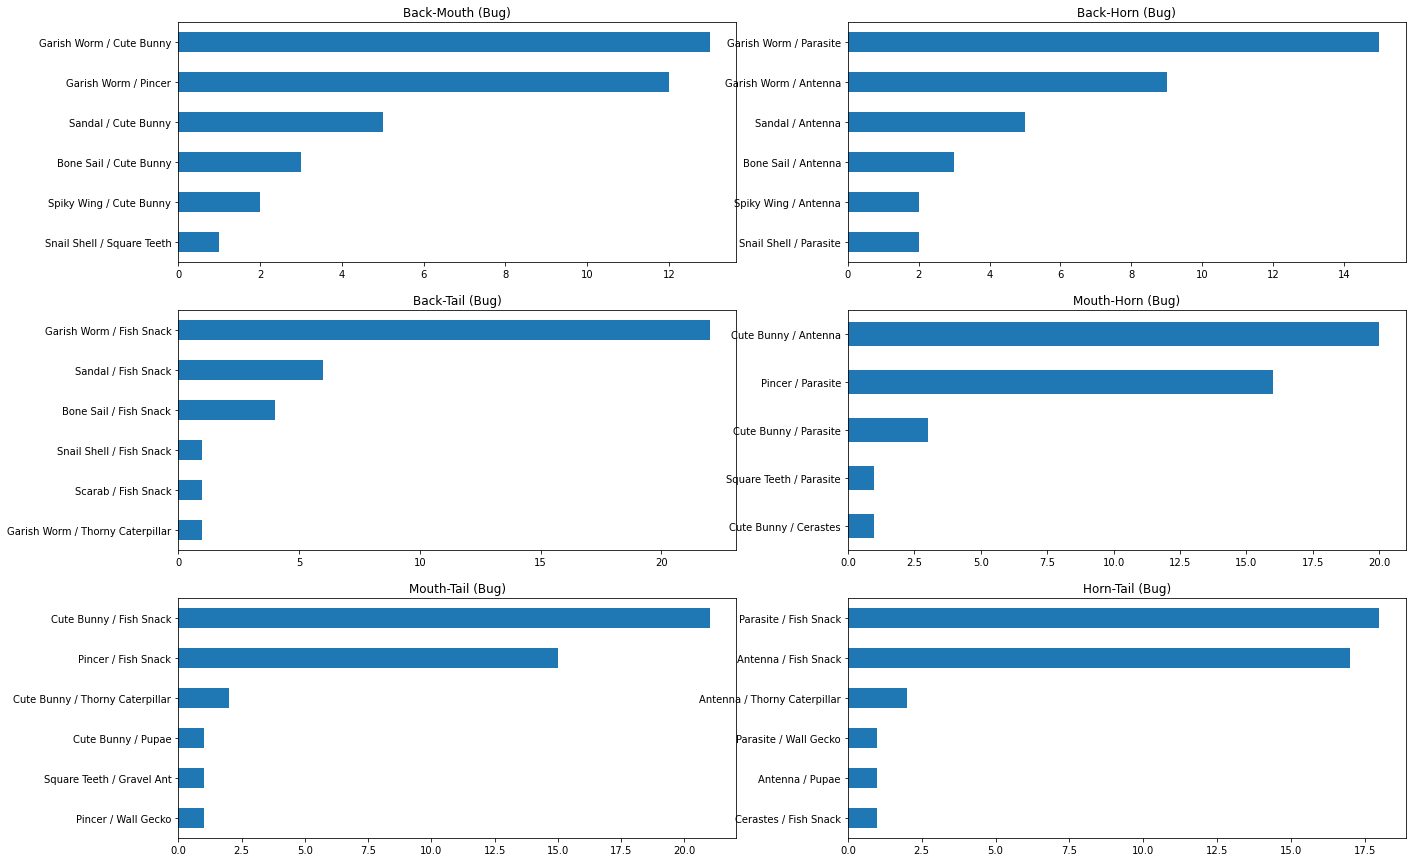

In [71]:
visualize_combo(df_pairs, "Bug")

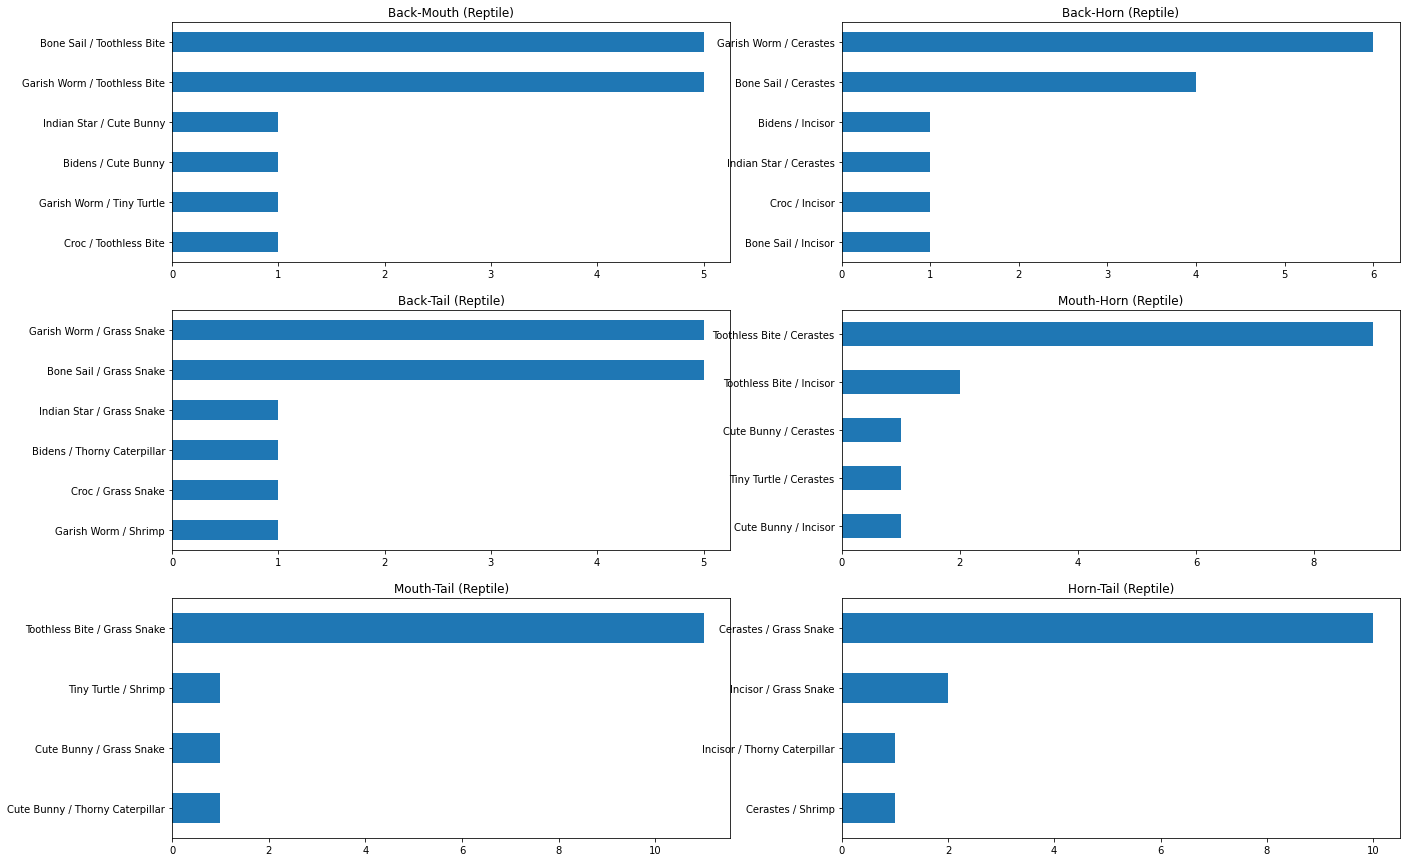

In [72]:
visualize_combo(df_pairs, "Reptile")

# Top Tri-Combo

In [73]:
def visualize_combo(df, cls):
  fig, axes = plt.subplots(2, 2, figsize=(22, 10))

  df[df["Class"] == cls]["Back-Mouth-Horn"].value_counts()[5::-1].plot.barh(title="Back-Mouth-Horn (" + cls + ")", ax=axes[0,0])
  df[df["Class"] == cls]["Back-Mouth-Tail"].value_counts()[5::-1].plot.barh(title="Back-Mouth-Tail (" + cls + ")", ax=axes[0,1])
  df[df["Class"] == cls]["Back-Horn-Tail"].value_counts()[5::-1].plot.barh(title="Back-Horn-Tail (" + cls + ")", ax=axes[1,0])
  df[df["Class"] == cls]["Mouth-Horn-Tail"].value_counts()[5::-1].plot.barh(title="Mouth-Horn-Tail (" + cls + ")", ax=axes[1,1])

In [74]:
ability_cols = ["Back", "Mouth", "Horn", "Tail"]

def generate_card_combo(row):
  for i in range(len(ability_cols)):
    for j in range(i + 1, len(ability_cols)):
      for k in range(j + 1, len(ability_cols)):
        new_col = ability_cols[i] + "-" + ability_cols[j] + "-" + ability_cols[k]
        row[new_col] = row[ability_cols[i]] + " / " + row[ability_cols[j]] + " / " + row[ability_cols[k]]
  return row

def card_combo(df):
  df = df.apply(generate_card_combo, axis=1)
  df = df.drop(["Eyes", "Ears", "Back", "Mouth", "Horn", "Tail"], axis=1)
  return df

df_combo = card_combo(df)

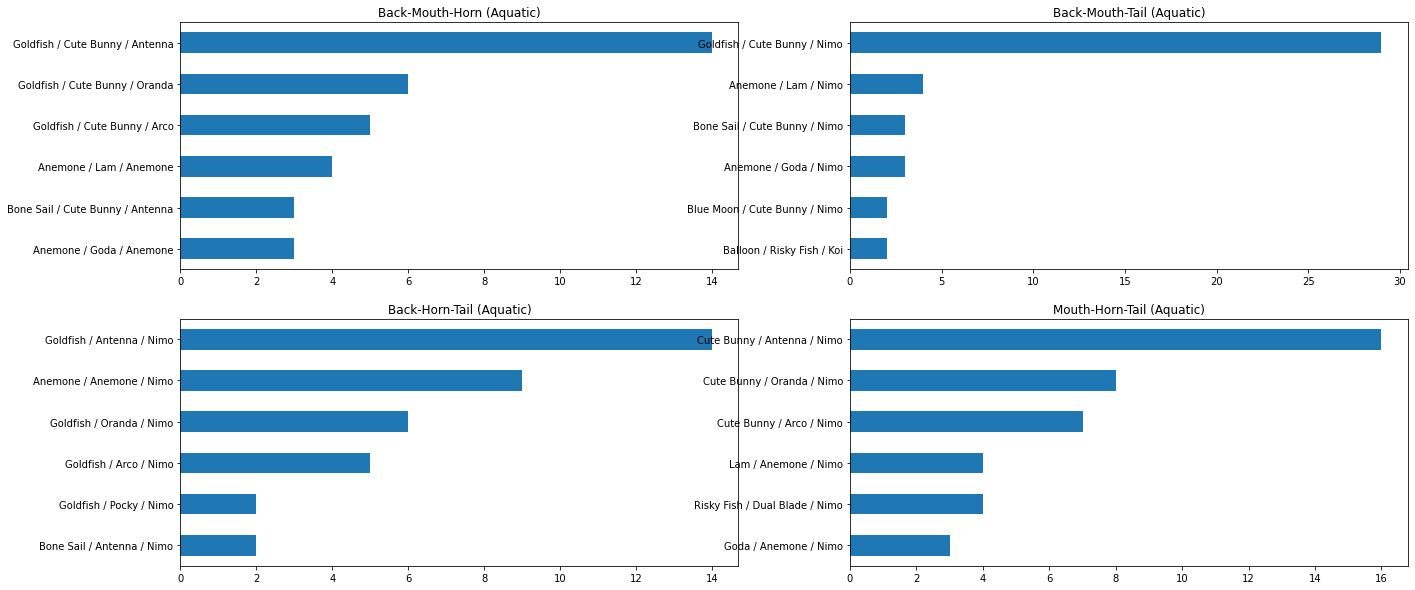

In [75]:
visualize_combo(df_combo, "Aquatic")

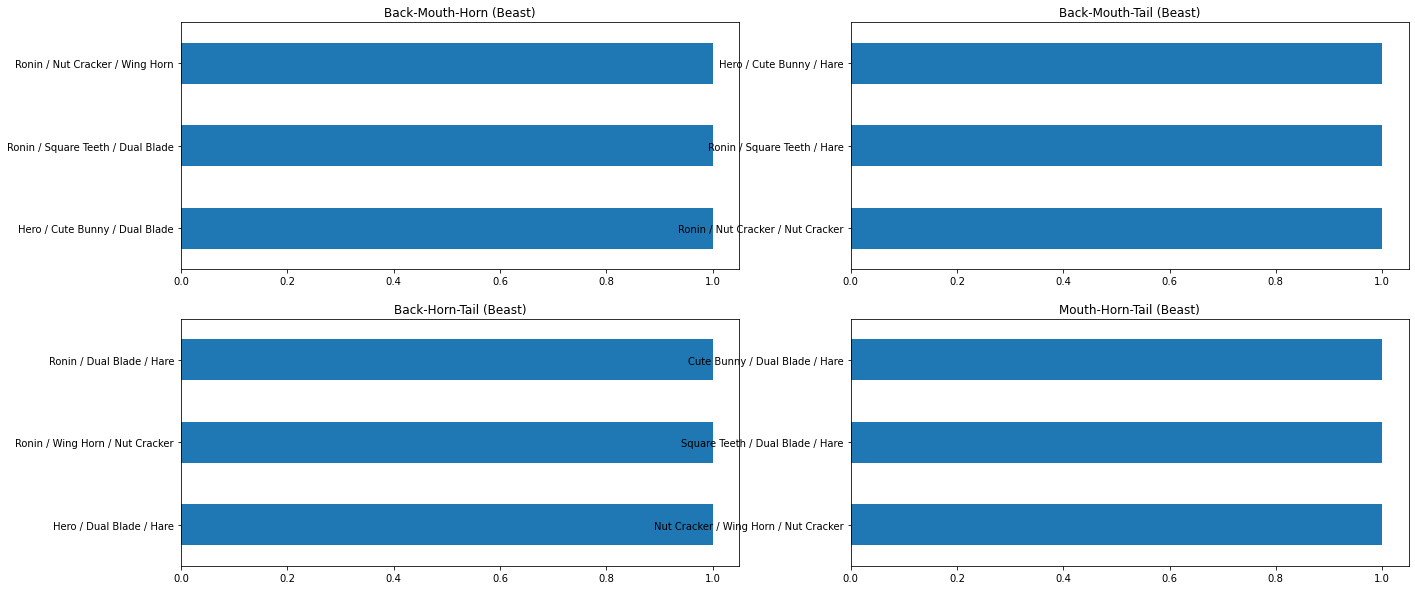

In [76]:
visualize_combo(df_combo, "Beast")

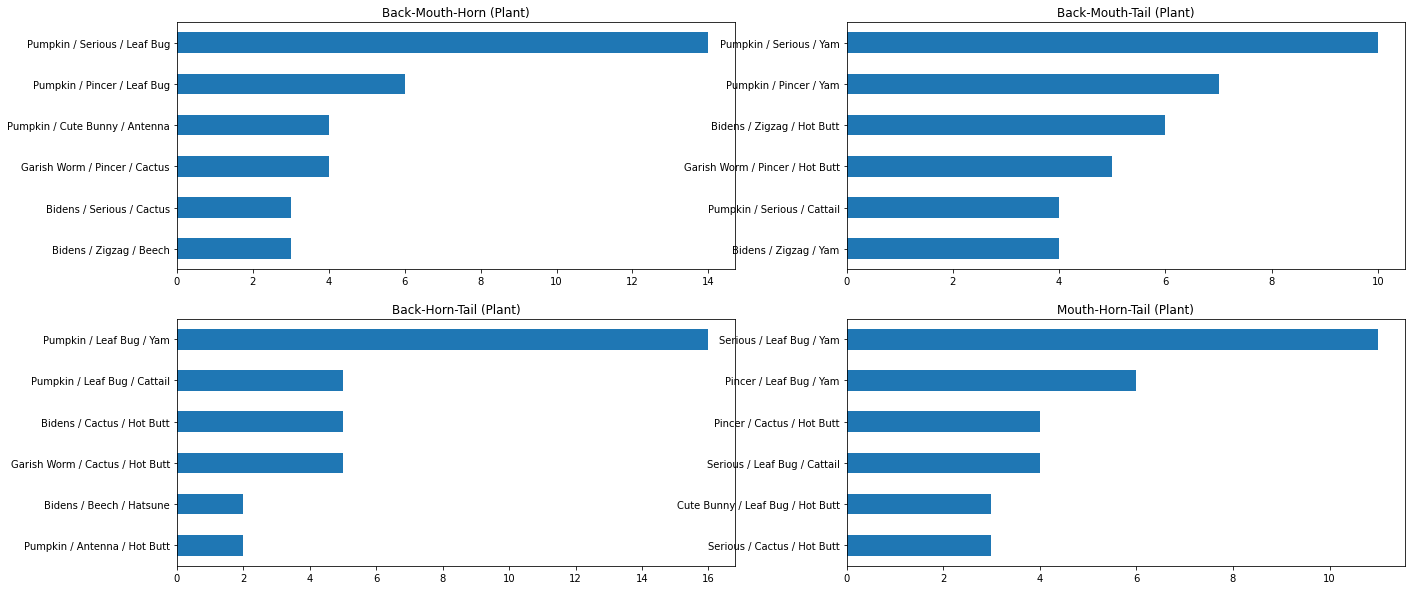

In [77]:
visualize_combo(df_combo, "Plant")

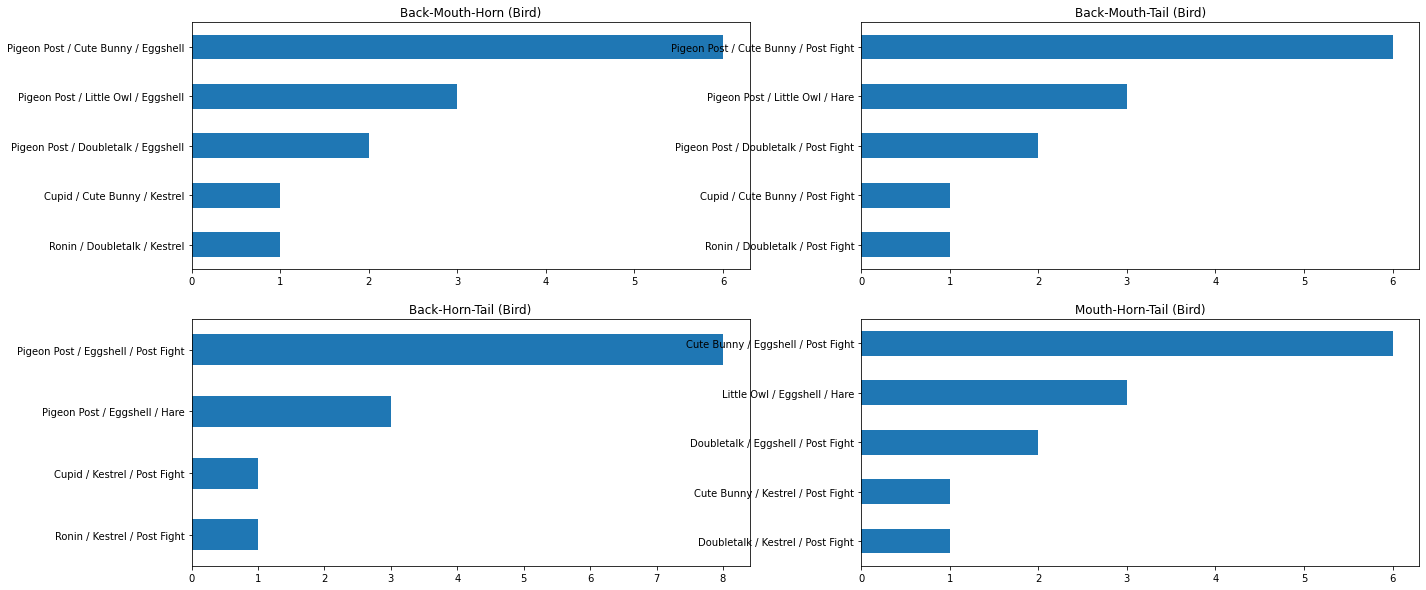

In [78]:
visualize_combo(df_combo, "Bird")

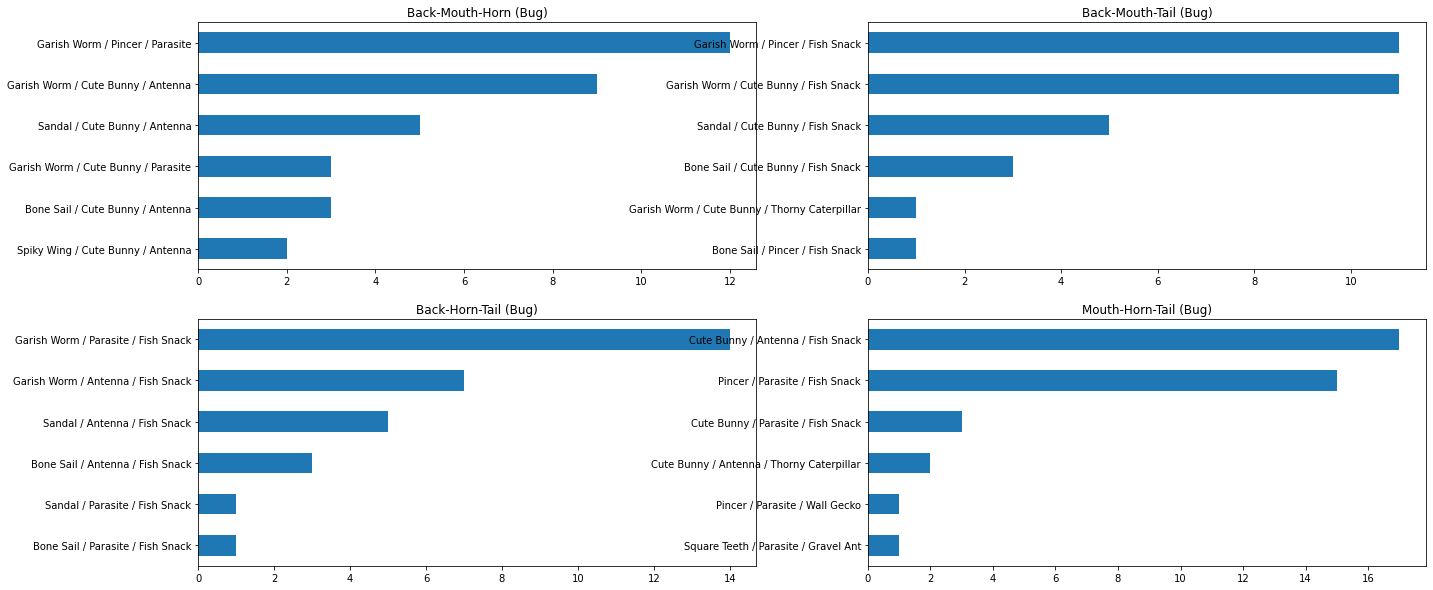

In [79]:
visualize_combo(df_combo, "Bug")

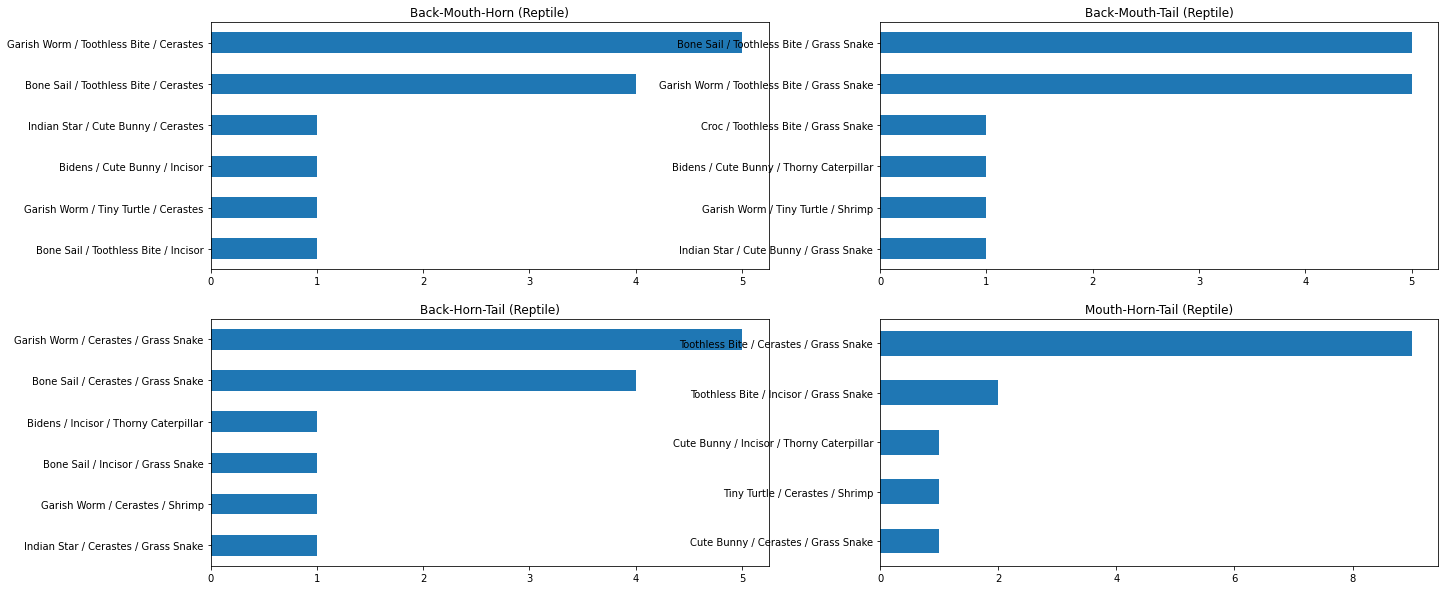

In [80]:
visualize_combo(df_combo, "Reptile")

# Top Build

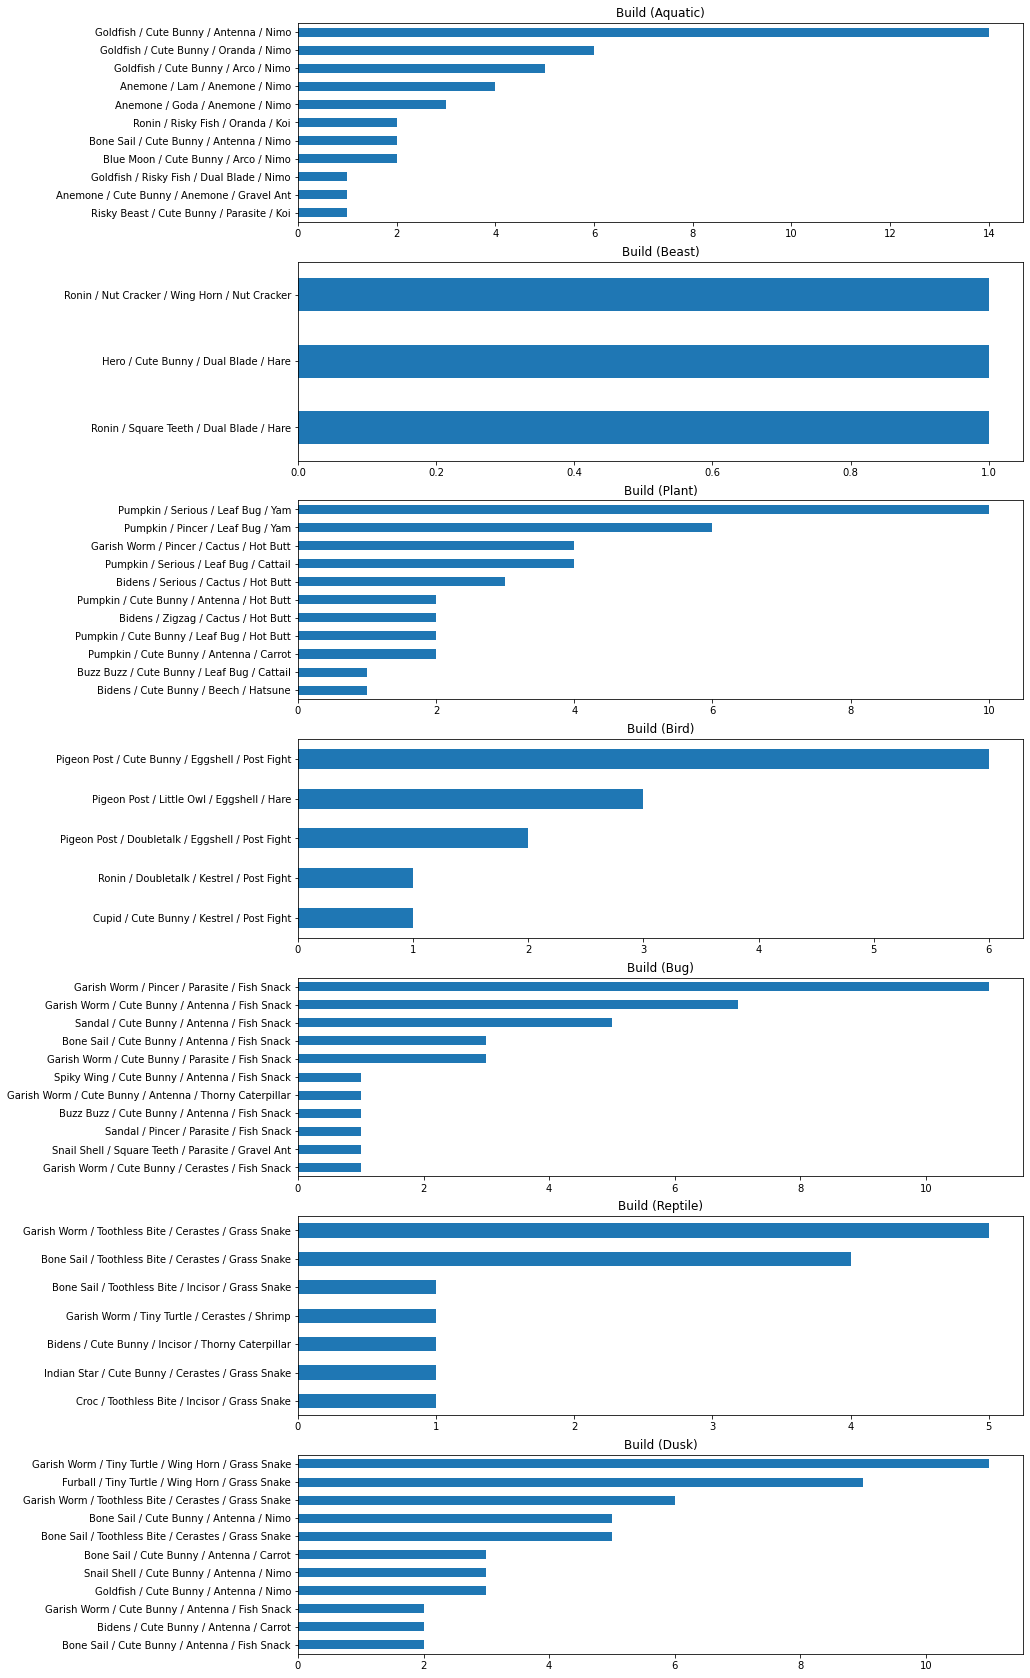

In [81]:
def visualize_build(df):
  fig, axes = plt.subplots(7, 1, figsize=(13, 30))

  df[df["Class"] == "Aquatic"]["Build"].value_counts()[10::-1].plot.barh(title="Build (Aquatic)", ax=axes[0])
  df[df["Class"] == "Beast"]["Build"].value_counts()[10::-1].plot.barh(title="Build (Beast)", ax=axes[1])
  df[df["Class"] == "Plant"]["Build"].value_counts()[10::-1].plot.barh(title="Build (Plant)", ax=axes[2])
  df[df["Class"] == "Bird"]["Build"].value_counts()[10::-1].plot.barh(title="Build (Bird)", ax=axes[3])
  df[df["Class"] == "Bug"]["Build"].value_counts()[10::-1].plot.barh(title="Build (Bug)", ax=axes[4])
  df[df["Class"] == "Reptile"]["Build"].value_counts()[10::-1].plot.barh(title="Build (Reptile)", ax=axes[5])
  df[df["Class"] == "Dusk"]["Build"].value_counts()[10::-1].plot.barh(title="Build (Dusk)", ax=axes[6])

def generate_card_build(row):
  row["Build"] = row["Back"] + " / " + row["Mouth"] + " / " + row["Horn"] + " / " + row["Tail"]
  return row

def card_build(df):
  df = df.apply(generate_card_build, axis=1)
  df = df.drop(["Eyes", "Ears", "Back", "Mouth", "Horn", "Tail"], axis=1)
  return df

df_build = card_build(df)
visualize_build(df_build)

# Build Winrate

In [87]:
def visualize_winrate_by_build(df, cls):
  plt.figure(figsize=(10, 6))
  df[df["Class"] == cls].groupby("Build")["Winrate"].mean().sort_values(ascending=False)[20::-1].plot.barh(title=cls)

In [91]:
df

,User_Addr,Class,Eyes,Ears,Back,Mouth,Horn,Tail,Winrate
0,https://axie.zone//profile?ron_addr=0x62ea77d4...,Plant,Papi,Lotus,Bidens,Zigzag,Pliers,Yam,0
1,https://axie.zone//profile?ron_addr=0x62ea77d4...,Reptile,Confused,Friezard,Bone Sail,Toothless Bite,Cerastes,Grass Snake,0
2,https://axie.zone//profile?ron_addr=0x62ea77d4...,Dusk,Telescope,Seaslug,Indian Star,Tiny Turtle,Wing Horn,Grass Snake,0
3,https://axie.zone//profile?ron_addr=0xdaf19aef...,Plant,Confused,Clover,Pumpkin,Pincer,Leaf Bug,Yam,0
4,https://axie.zone//profile?ron_addr=0xdaf19aef...,Dusk,Gecko,Tiny Fan,Garish Worm,Toothless Bite,Cerastes,Grass Snake,0
...,...,...,...,...,...,...,...,...,...
298,https://axie.zone//profile?ron_addr=0xd8dcd4ea...,Dusk,Gero,Seaslug,Garish Worm,Cute Bunny,Antenna,Fish Snack,0
299,https://axie.zone//profile?ron_addr=0xd8dcd4ea...,Dusk,Clear,Bubblemaker,Goldfish,Cute Bunny,Antenna,Nimo,0
300,https://axie.zone//profile?ron_addr=0x6f476377...,Bug,Bookworm,Pink Cheek,Garish Worm,Pincer,Parasite,Wall Gecko,0
301,https://axie.zone//profile?ron_addr=0x6f476377...,Aquatic,Clear,Risky Bird,Goldfish,Cute Bunny,Oranda,Nimo,0


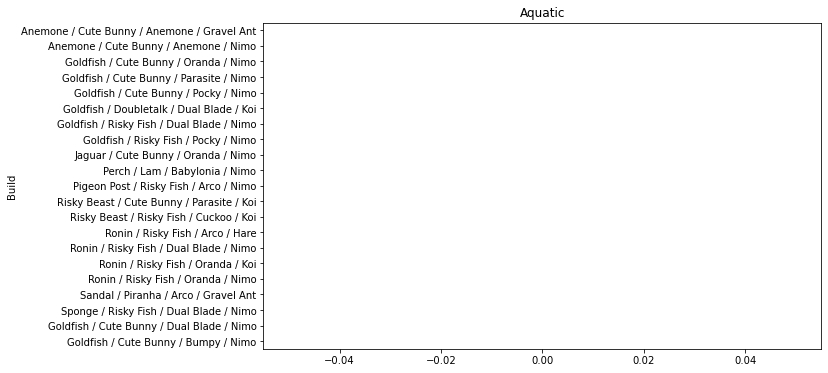

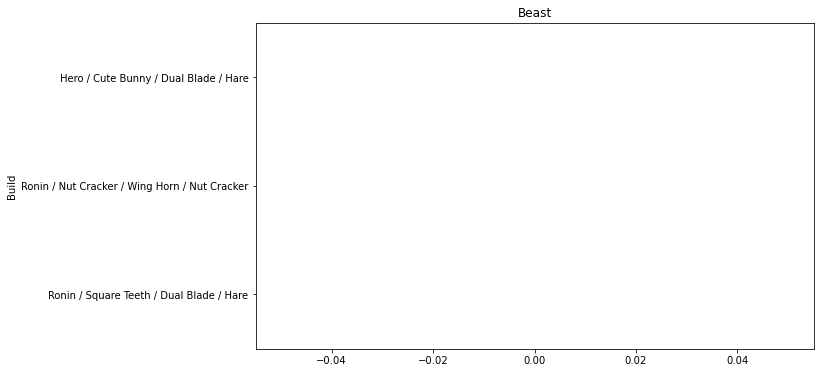

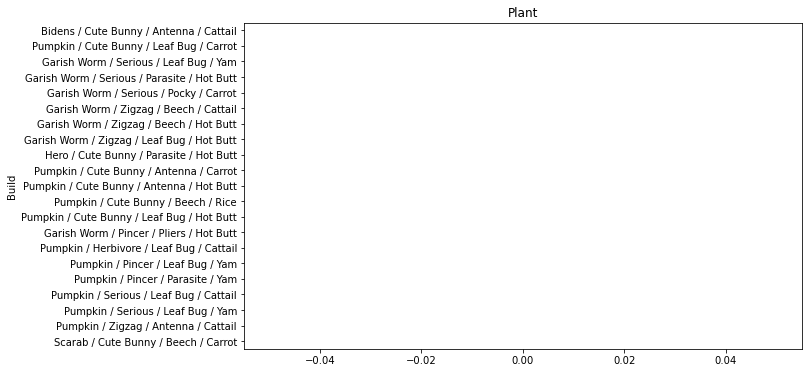

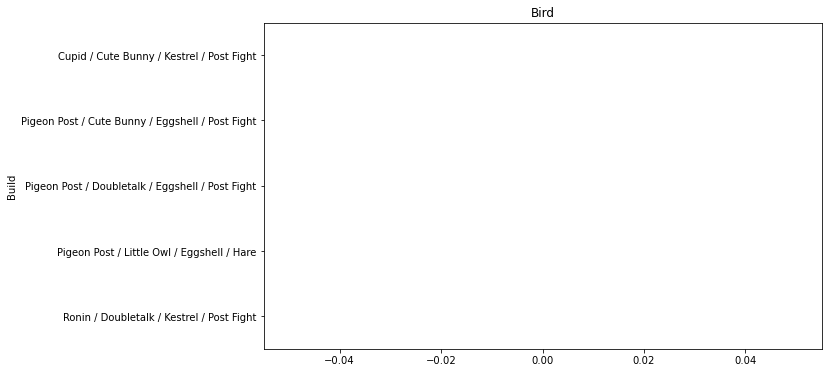

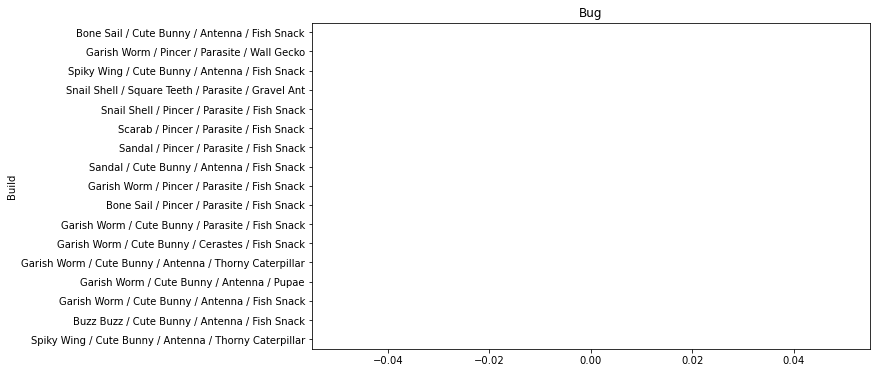

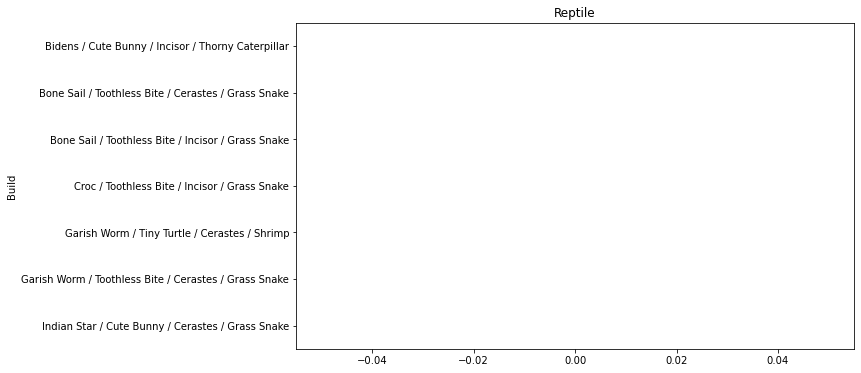

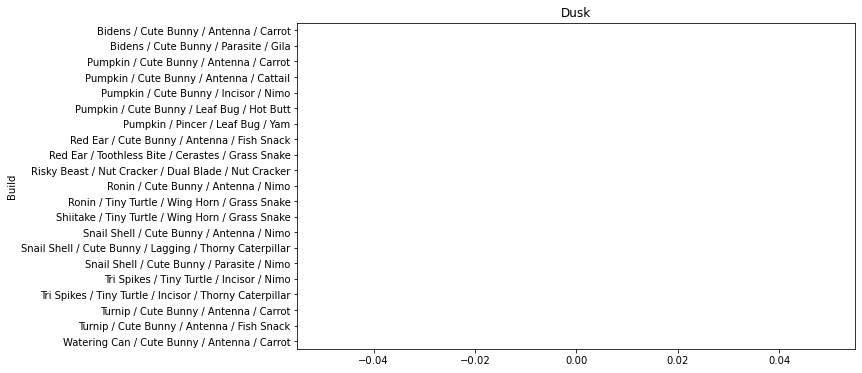

In [89]:
visualize_winrate_by_build(df_build, "Aquatic")
visualize_winrate_by_build(df_build, "Beast")
visualize_winrate_by_build(df_build, "Plant")
visualize_winrate_by_build(df_build, "Bird")
visualize_winrate_by_build(df_build, "Bug")
visualize_winrate_by_build(df_build, "Reptile")
visualize_winrate_by_build(df_build, "Dusk")

In [90]:
df_test = df_build.copy()

wr = df_test.groupby("Build", as_index=False)["Winrate"].mean()
wr = wr.rename(columns={'Winrate': 'Avg_Winrate'})

df_test = df_test["Build"].value_counts().rename_axis('Build').reset_index(name='counts')
df_test = pd.merge(df_test, wr, on="Build")

df_popular_high_wr = df_test[df_test["counts"] > 2].sort_values("Avg_Winrate", ascending=False)
df_popular_high_wr

,Build,counts,Avg_Winrate
0,Goldfish / Cute Bunny / Antenna / Nimo,17,0
1,Garish Worm / Pincer / Parasite / Fish Snack,12,0
24,Pumpkin / Cute Bunny / Leaf Bug / Hot Butt,3,0
23,Bidens / Serious / Cactus / Hot Butt,3,0
22,Bone Sail / Cute Bunny / Antenna / Carrot,3,0
21,Pigeon Post / Little Owl / Eggshell / Hare,3,0
20,Snail Shell / Cute Bunny / Antenna / Nimo,3,0
19,Pumpkin / Cute Bunny / Antenna / Carrot,3,0
18,Garish Worm / Cute Bunny / Parasite / Fish Snack,3,0
17,Garish Worm / Pincer / Cactus / Hot Butt,4,0


In [86]:
# 